In [191]:
%pip install umap-learn
%pip install pandas
%pip instal sklearn
%pip install scikit-learn matplotlib
%pip install geopy



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instal" - maybe you meant "install"



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [192]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load your dataset
data_path = "../DASH_-_Global_School-based_Student_Health_Survey__GSHS.csv"
data = pd.read_csv(data_path)

# Relevant columns
key_columns = ["LocationDesc", "Age", "Sex", "ShortQuestionText", "Greater_Risk_Data_Value"]
data = data[key_columns]
data = data[data["Sex"] != "Total"]

# Define desired questions
desired_questions = ["Current cigarette use", "Current tobacco use", "Current alcohol use", "Current marijuana use", "Fast food eating"]
filtered_data = data[data["ShortQuestionText"].isin(desired_questions)]

# Process Age column
def preprocess_age(age):
    try:
        if "-" in age:  # Exclude ranges like "13-15"
            return None
        elif age.isdigit():  # Retain only single numeric values
            return float(age)
        else:
            return None
    except:
        return None

filtered_data["Age"] = filtered_data["Age"].apply(preprocess_age)
filtered_data = filtered_data.dropna(subset=["Age", "Greater_Risk_Data_Value"])

# Convert 'Greater_Risk_Data_Value' to numeric
filtered_data["Greater_Risk_Data_Value"] = pd.to_numeric(filtered_data["Greater_Risk_Data_Value"], errors="coerce")
filtered_data = filtered_data.dropna(subset=["Greater_Risk_Data_Value"])

# Pivot data
data_pivot = filtered_data.pivot_table(
    index=["LocationDesc", "Age", "Sex"],
    columns="ShortQuestionText",
    values="Greater_Risk_Data_Value",
    aggfunc="mean"
).reset_index()

# Flatten multi-index columns
data_pivot.columns.name = None
data_pivot.columns = [str(col) for col in data_pivot.columns]
data_pivot = data_pivot.dropna(subset=desired_questions)

# Normalize behavioral features by dividing by 100
behavior_features = ["Current cigarette use", "Current tobacco use", "Current alcohol use", "Current marijuana use", "Fast food eating"]
data_pivot[behavior_features] = data_pivot[behavior_features] / 100  # Normalize as percentages

# Encode 'Sex' (Male = 0, Female = 1)
label_encoder = LabelEncoder()
data_pivot["Sex"] = label_encoder.fit_transform(data_pivot["Sex"])

# Define features for clustering (only behavioral features for clustering)
features = behavior_features
X_behavioral = data_pivot[features]  # Behavioral features only

# Combine demographics for analysis (not clustering)
X_demographics = data_pivot[["Age", "Sex"]].reset_index(drop=True)

# Final output: Behavioral data + Demographics
X_combined = pd.concat([X_behavioral, X_demographics], axis=1)

# Final normalized DataFrame
print("\nFull Dataset for Clustering and Analysis:")
print(X_combined.head())
print(f"Number of rows in the dataset: {len(X_combined)}")



Full Dataset for Clustering and Analysis:
    Current cigarette use  Current tobacco use  Current alcohol use  \
45               0.118717             0.137608             0.346931   
46               0.096480             0.111648             0.318242   
47               0.196727             0.208529             0.507103   
48               0.184355             0.211817             0.514073   
49               0.283847             0.293702             0.591297   

    Current marijuana use  Fast food eating   Age  Sex  
45               0.029153          0.327050  15.0  0.0  
46               0.035615          0.321340  15.0  1.0  
47               0.046483          0.321388  14.0  0.0  
48               0.064073          0.303536  14.0  1.0  
49               0.058746          0.286461  15.0  0.0  
Number of rows in the dataset: 916


C:\Users\coope\AppData\Local\Temp\ipykernel_54612\2837519561.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Age"] = filtered_data["Age"].apply(preprocess_age)


In [193]:
location_list = [
    "Argentina", "Argentina Chaco", "Argentina Chubut", "Argentina Cordoba", "Argentina Corrientes", 
    "Argentina Cuidad de Buenos Aires", "Argentina Entre Rios", "Argentina Jujuy", "Argentina La Pampa", 
    "Argentina La Rioja", "Argentina Mendoza", "Argentina Misiones", "Argentina Neuquen", 
    "Argentina Rio Negro", "Argentina Salta", "Argentina San Juan", "Argentina San Luis", 
    "Argentina Santa Cruz", "Argentina Santa Fe", "Argentina Santiago del Estero", "Argentina Tierra del Fuego", 
    "Argentina Tucuman", "Bahamas", "Bangladesh", "Barbados", "Benin", "Bolivia", "Bolivia Highland", 
    "Bolivia Plains", "Bolivia Valley", "Brunei Darussalam", "Cambodia", "Cambodia Rural", 
    "Cambodia Urban", "Chile", "Cook Islands", "Curacao", "Ghana Junior High", "Ghana Senior High", 
    "Indonesia", "Indonesia (Java)", "Indonesia (Outside Java and Sumatra)", "Indonesia (Sumatra)", 
    "Kiribati", "Malaysia", "Malaysia - A", "Malaysia - B", "Malaysia - C", "Malaysia - D", 
    "Malaysia - E", "Malaysia - F", "Malaysia - G", "Malaysia - H", "Malaysia - I", "Malaysia - J", 
    "Malaysia - K", "Malaysia - L", "Malaysia - M", "Malaysia - N", "Malaysia - O", "Maldives", 
    "Maldives (Atolls)", "Maldives (Male)", "Mauritius (Mauritius)", "Mauritius (Rodriques)", 
    "Mongolia", "Mongolia Rural", "Mongolia Urban", "Morocco", "Mozambique", "Namibia", "Peru", 
    "Philippines", "Philippines (Davao City)", "Philippines (Luzon)", "Philippines (Malita)", 
    "Philippines (Mindanao)", "Philippines (Visayas)", "Republic of Laos", "Samoa", "Seychelles", 
    "Solomon Islands", "Tanzania", "Thailand", "Thailand (Private)", "Thailand (Public)", 
    "Timor Leste", "Tonga", "Trinidad and Tobago", "Trinidad and Tobago (Tobago)", 
    "Trinidad and Tobago (Trinidad)", "Tuvalu", "Wallis and Futuna"
]

# Region mapping with East Asia and West Asia added
region_mapping = {
    "Africa": [
        "Benin", "Ghana", "Morocco", "Mozambique", "Namibia", "Seychelles", "Tanzania"
    ],
    "East Asia": [
        "Cambodia", "Cambodia Rural", "Cambodia Urban", "Indonesia", "Indonesia (Java)", 
        "Indonesia (Outside Java and Sumatra)", "Indonesia (Sumatra)", "Malaysia", 
        "Malaysia - A", "Malaysia - B", "Malaysia - C", "Malaysia - D", "Malaysia - E", 
        "Malaysia - F", "Malaysia - G", "Malaysia - H", "Malaysia - I", "Malaysia - J", 
        "Malaysia - K", "Malaysia - L", "Malaysia - M", "Malaysia - N", "Malaysia - O", 
        "Philippines", "Philippines (Davao City)", "Philippines (Luzon)", "Philippines (Malita)", 
        "Philippines (Mindanao)", "Philippines (Visayas)", "Republic of Laos", "Thailand", 
        "Thailand (Private)", "Thailand (Public)", "Timor Leste"
    ],
    "West Asia": [
        "Bangladesh", "Brunei Darussalam", "Maldives", "Maldives (Atolls)", 
        "Maldives (Male)", "Mauritius (Mauritius)", "Mauritius (Rodriques)", "Mongolia", 
        "Mongolia Rural", "Mongolia Urban"
    ],
    "South America": [
        "Argentina", "Argentina Chaco", "Argentina Chubut", "Argentina Cordoba", 
        "Argentina Corrientes", "Argentina Cuidad de Buenos Aires", "Argentina Entre Rios", 
        "Argentina Jujuy", "Argentina La Pampa", "Argentina La Rioja", "Argentina Mendoza", 
        "Argentina Misiones", "Argentina Neuquen", "Argentina Rio Negro", "Argentina Salta", 
        "Argentina San Juan", "Argentina San Luis", "Argentina Santa Cruz", "Argentina Santa Fe", 
        "Argentina Santiago del Estero", "Argentina Tierra del Fuego", "Argentina Tucuman", 
        "Bolivia", "Bolivia Highland", "Bolivia Plains", "Bolivia Valley", "Chile", "Peru"
    ],
    "North America & Caribbean": [
        "Bahamas", "Barbados", "Cook Islands", "Curacao", "Trinidad and Tobago", 
        "Trinidad and Tobago (Tobago)", "Trinidad and Tobago (Trinidad)"
    ],
    "Oceania": [
        "Kiribati", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Wallis and Futuna"
    ]
}

# Function to map locations to regions
def map_region(location):
    for region, countries in region_mapping.items():
        if any(country in location for country in countries):
            return region
    return "Unknown"


# Create a DataFrame for locations
df_locations = pd.DataFrame({"Location": location_list})
df_locations["Region"] = df_locations["Location"].apply(map_region)

data_pivot = data_pivot.merge(df_locations, left_on="LocationDesc", right_on="Location", how="left")
data_pivot.rename(columns={"Region": "Region"}, inplace=True)




c:\Cooper\BME3053C\BME3053C\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


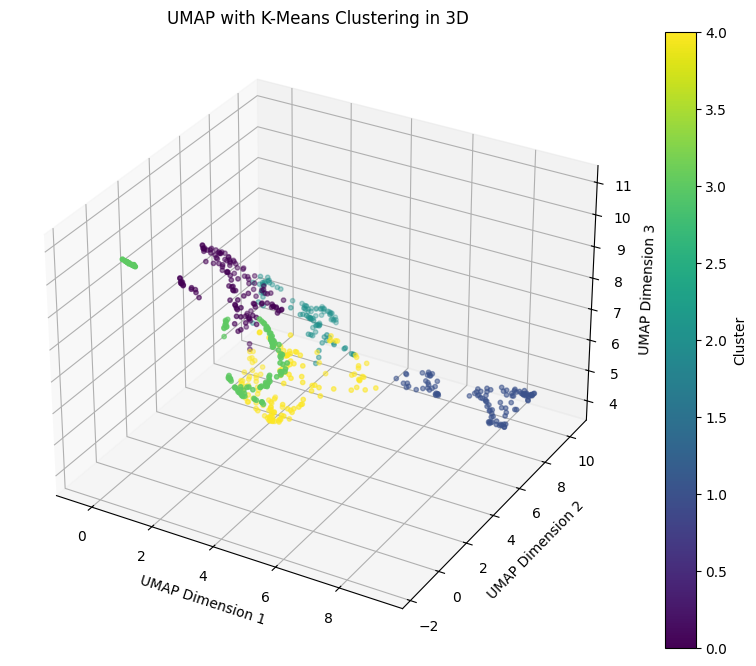

Cluster Analysis (Mean Values):
         Current cigarette use  Current tobacco use  Current alcohol use  \
Cluster                                                                    
0                     0.037361             0.051842             0.070496   
1                     0.234650             0.250766             0.529827   
2                     0.040778             0.055202             0.084045   
3                     0.143779             0.188154             0.297782   
4                     0.192738             0.219560             0.174353   

         Current marijuana use  Fast food eating        Age       Sex  
Cluster                                                                
0                     0.009974          0.541803  14.250000  0.218750  
1                     0.087966          0.285362  14.490741  0.500000  
2                     0.013804          0.333162  14.591837  0.357143  
3                     0.078579          0.719534  14.578947  0.500000  
4  

In [194]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=3, random_state=40)
X_umap = reducer.fit_transform(X_behavioral)  # Use behavioral features only for dimensionality reduction

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=40)  # Adjust the number of clusters as needed
labels = kmeans.fit_predict(X_umap)
data_pivot["Cluster"] = labels  # Add cluster labels to the DataFrame

# Plot UMAP results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=labels, cmap="viridis", s=10)
fig.colorbar(scatter, label="Cluster")

# Set axis labels and title
ax.set_title("UMAP with K-Means Clustering in 3D")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

plt.show()

# Cluster analysis
cluster_analysis = data_pivot.groupby("Cluster")[behavior_features + ["Age", "Sex"]].mean()
print("Cluster Analysis (Mean Values):")
print(cluster_analysis)

# Optional: Cluster size
cluster_sizes = data_pivot["Cluster"].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)


In [195]:
print("\nCluster Information:")
cluster_summary = data_pivot.groupby("Cluster").size().reset_index(name="ClusterSize")
print(cluster_summary)

# Function to display regional makeup of a specified cluster
def display_cluster_region_info(cluster_number):
    print(f"\nRegional Makeup of Cluster {cluster_number}:")
    cluster_points = data_pivot[data_pivot["Cluster"] == cluster_number]
    
    # Group by Region and count the occurrences
    regional_makeup = cluster_points.groupby("Region").size().reset_index(name="RegionCount")
    regional_makeup = regional_makeup.sort_values(by="RegionCount", ascending=False)
    
    print(regional_makeup)


display_cluster_region_info(0)
display_cluster_region_info(1)
display_cluster_region_info(2)
display_cluster_region_info(3)
display_cluster_region_info(4)




Cluster Information:
   Cluster  ClusterSize
0        0          128
1        1          108
2        2           98
3        3          114
4        4          143

Regional Makeup of Cluster 0:
                      Region  RegionCount
1                  East Asia           73
5                  West Asia           25
0                     Africa           16
4              South America           12
3                    Oceania            1
2  North America & Caribbean            1

Regional Makeup of Cluster 1:
          Region  RegionCount
2  South America          102
0      East Asia            4
1        Oceania            2

Regional Makeup of Cluster 2:
          Region  RegionCount
1      East Asia           61
4      West Asia           17
0         Africa           13
3  South America            5
2        Oceania            2

Regional Makeup of Cluster 3:
                      Region  RegionCount
2  North America & Caribbean           40
1                  East Asia    